# EU Demographic Data & Physical Activity

### Imports

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

# pd.options.display.max_rows = 100
pd.options.display.max_columns = 120
pd.set_option('future.no_silent_downcasting', True)

Matplotlib is building the font cache; this may take a moment.


## Clean Data

In [202]:
data_path = 'data/raw/'
data_files = sorted(os.listdir(data_path))


def get_column_names(df, keyword_fr, keyword_eng):
    fr_idx = df.isin([keyword_fr]).any(axis=1).idxmax()
    eng_idx = df.isin([keyword_eng]).any(axis=1).idxmax()
    col_names = df.loc[[fr_idx, eng_idx], :].ffill().ffill(axis=1).iloc[1, 2:].tolist()
    return col_names


def df_cleaning(df):
    drop_na_df = df.dropna(axis=1, how='all').dropna(axis=0, how='all').reset_index(drop=True)
    redundant_cols = drop_na_df.columns[4:8].tolist() + drop_na_df.columns[15:21].tolist() + drop_na_df.columns[89:116].tolist()
    slim_df = drop_na_df.drop(columns=redundant_cols)
    slim_df.columns = range(0, len(slim_df.columns))

    if str(slim_df.iloc[2, 6]) != 'nan':
        query = ' '.join(slim_df.iloc[1, 6].split()[1:]) + ' ' + slim_df.iloc[2, 6]
    else:
        query = ' '.join(slim_df.iloc[1, 6].split()[1:]).strip("- .")
    main_cols = ['Options', 'Participants/Percent'] + get_column_names(slim_df, 'Sexe', 'Gender')
    sub_cols = ['Options', 'Participants/Percent'] + get_column_names(slim_df, 'Homme', 'Man')
    first_row_idx = slim_df.isin(['TOTAL']).any(axis=1).idxmax()
    formatted_df = pd.DataFrame(slim_df.iloc[first_row_idx:].values, columns=[[query]*len(main_cols), main_cols, sub_cols]).dropna(axis=1, how='all')
    clean_df = formatted_df.replace(regex=r'(- )|(– )', value=0)

    # fix options column (replace french with english, fill NaNs with previous value)
    options = clean_df.iloc[1:, [0]].replace('Aucun', '0 days')
    ff_opts = options.ffill().T.values[0]

    if len(options) % 2 != 0:
        ff_opts = ff_opts[:-1]

    if (ff_opts[::2] != ff_opts[1::2]).any():
        ff_opts[::2] = ff_opts[1::2]

    if len(options) % 2 != 0:
        clean_df.iloc[1:-1, 0] = ff_opts
        clean_df.iloc[-1, 0] = 'Average'
    else:
        clean_df.iloc[1:, 0] = ff_opts

    return clean_df


def save_df(path, df, name):
    with open(path, 'w') as f:
        df.to_csv(f, index=False)
    print(f' {name} cleaned and saved')

In [203]:
# name = "QB3a2R.csv"
# file_path = data_path + name
# df = pd.read_csv(file_path, skipinitialspace=True)
# clean_df = df_cleaning(df)
# display(clean_df.head())


In the last 7 days, on how many days did you do vigorous physical activity like lifting heavy things, digging, aerobics or fast cycling? (DO NOT SHOW SCREEN - DO NOT READ OUT)  \
                                                                                                                                                                          Options   
                                                                                                                                                                          Options   
0                                              TOTAL                                                                                                                                
1                                             0 days                                                                                                                                
2                                             0 days                                                                                                                                
3                                           1-3 days                                                                                                                                
4                                           1-3 days                                                                                                                                

                                                                          \
  Participants/Percent Gender          Age                                 
  Participants/Percent    Man  Woman 15-24 25-34 35-44 45-54 55-64 65-74   
0                28031  13524  14507  3640  4107  4599  4794  4118  4141   
1                16195   6843   9352  1523  1872  2403  2711  2623  2910   
2                 0.58   0.51   0.65  0.42  0.45  0.52  0.57  0.64   0.7   
3                 7648   4158   3490  1348  1402  1435  1338   964   832   
4                 0.27   0.31   0.24  0.37  0.34  0.31  0.28  0.23   0.2   

                                                        \
        Education (End of)                               
    75+                15-  16-19   20+ Still studying   
0  2630               4694  11788  8518           2435   
1  2153               3629   7097  4101            922   
2  0.82               0.77    0.6  0.48           0.38   
3   329                612   2863  3124            953   
4  0.12               0.13   0.24  0.37           0.39   

                                                                           \
  Socio-professional category                                               
               Self- employed Managers Other white collars Manual workers   
0                        2184     3057                3379           6005   
1                        1071     1345                1826           3150   
2                        0.49     0.44                0.54           0.52   
3                         720     1244                1188           1489   
4                        0.33     0.41                0.35           0.25   

                                                             \
                                            Marital status    
  House persons Unemployed Retired Students         Married   
0          1528       1771    7672     2435           14176   
1          1164       1120    5597      922            8386   
2          0.76       0.63    0.73     0.38            0.59   
3           218        419    1418      953            3833   
4          0.14       0.24    0.19     0.39            0.27   

                                                                   \
                                                                    
  Single living with a partner Single Divorced or separated Widow   
0                         3332   5948                  1882  2372   
1                         1683   2864                  1214  1903   
2           

In [83]:
# clean_path = 'data/clean/' + name + '_clean.csv'
# save_df(clean_path, clean_df, name)
# read_df = pd.read_csv(clean_path, header=[0, 1])
# display(read_df.head(10))

In [205]:
# for file in data_files:
#     name = file[:-4]
#     file_path = data_path + file
#     df = pd.read_csv(file_path, skipinitialspace=True)
#     clean_df = df_cleaning(df)

#     clean_path = 'data/clean/' + name + '_clean.csv'
#     save_df(clean_path, clean_df, name)
#     read_df = pd.read_csv(clean_path)


## Explore Data

In [286]:
clean_dir = 'data/clean/'
clean_paths = sorted(os.listdir(clean_dir))

def get_query(df):
    return df.columns.get_level_values(0)[0]

def get_options(df):
    return df.iloc[1:, 0].unique()

def csv_to_df(path):
    return pd.read_csv(path, header=[0,1,2])

### Questions/Options

In [287]:
# for path in clean_paths:
#     file_path = clean_dir + path
#     df = csv_to_df(file_path)
#     query = get_query(df)
#     options = get_options(df)
#     print(f'- {query} ({path})\n    > {options[:3]} (etc. - total: {len(options)})\n')

## Visualizations

In [288]:
def get_numbers(df):
    return df.iloc[1::2, :].reset_index(drop=True)

def get_percents(df):
    return df.iloc[2::2, :].reset_index(drop=True)


In [369]:
def simp_plot(df, x, y, title, time_scale, x_labels, hue=0):
    fig, ax = plt.subplots(figsize=(10, 3))
    if hue:
        sns.barplot(data=df, x=x, y=y, hue=hue, ax=ax)
    else:
        sns.barplot(data=df, x=x, y=y, ax=ax)
    ax.set_title(title, fontsize=10)
    ax.set_ylabel('Percent')
    ax.set_xlabel(time_scale)
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels)
    return fig

In [359]:
sit_df = get_numbers(csv_to_df(clean_dir + 'QB6_clean.csv'))
walk_df = get_numbers(csv_to_df(clean_dir + 'QB5b2_clean.csv'))
mod_df = get_numbers(csv_to_df(clean_dir + 'QB4b2_clean.csv'))
vig_df = get_numbers(csv_to_df(clean_dir + 'QB3b2_clean.csv'))

,Options,Participants
0,1 hour or less,1276.0
1,1 hour to 1 hour and 30 minutes,1054.0
2,1 hour 31 minutes to 2 hours 30 minutes,2249.0
3,2 hours 31 minutes to 3 hours 30 minutes,3737.0
4,3 hours 31 minutes to 4 hours 30 minutes,3939.0
5,4 hours 31 minutes to 5 hours 30 minutes,3650.0
6,5 hours 31 minutes to 6 hours 30 minutes,3303.0
7,6 hours 31 minutes to 7 hours 30 minutes,2728.0
8,7 hours 31 minutes to 8 hours 30 minutes,2073.0
9,More than 8 hours and 30 minutes,3275.0


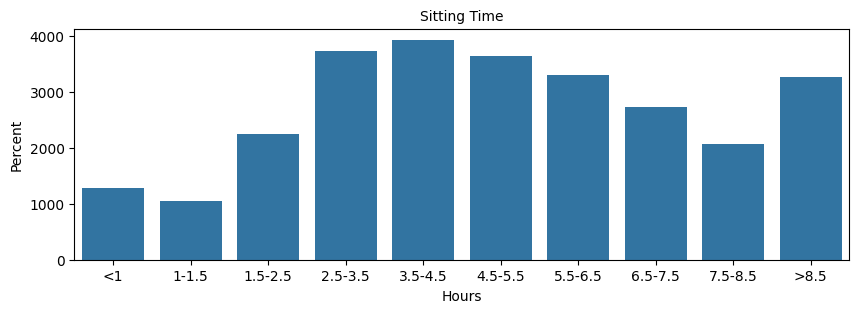

In [370]:
sit_viz_df = sit_df.droplevel([0,1], axis=1).iloc[:10, :2].rename(columns={'Participants/Percent': 'Participants'})
sit_options = ['<1', '1-1.5', '1.5-2.5', '2.5-3.5', '3.5-4.5', '4.5-5.5', '5.5-6.5', '6.5-7.5', '7.5-8.5', '>8.5']
display(sit_viz_df)

fig = simp_plot(sit_viz_df, 'Options', 'Participants', 'Sitting Time', 'Hours', sit_options)


In [361]:
walk_viz_df = walk_df.droplevel([0,1], axis=1).iloc[:5, :2].rename(columns={'Participants/Percent': 'Walking'})
display(walk_viz_df)

,Options,Walking
0,30 minutes or less,10472.0
1,31 to 60 minutes,8243.0
2,61 to 90 minutes,2537.0
3,91 to 120 minutes,947.0
4,More than 120 minutes,1077.0


In [362]:
mod_viz_df = mod_df.droplevel([0,1], axis=1).iloc[:5, [1]].rename(columns={'Participants/Percent': 'Moderate'})
display(mod_viz_df)

,Moderate
0,3482.0
1,5786.0
2,2630.0
3,1102.0
4,1384.0


In [363]:
vig_viz_df = vig_df.droplevel([0,1], axis=1).iloc[:5, [1]].rename(columns={'Participants/Percent': 'Vigorous'})
display(vig_viz_df)

,Vigorous
0,1809.0
1,4572.0
2,2507.0
3,1147.0
4,1489.0


In [371]:
merged_act_df = pd.concat([walk_viz_df, mod_viz_df, vig_viz_df], axis=1)
merged_viz_df = merged_act_df.melt(id_vars='Options', var_name='Activity', value_name='Participants')
merged_viz_df

,Options,Activity,Participants
0,30 minutes or less,Walking,10472.0
1,31 to 60 minutes,Walking,8243.0
2,61 to 90 minutes,Walking,2537.0
3,91 to 120 minutes,Walking,947.0
4,More than 120 minutes,Walking,1077.0
5,30 minutes or less,Moderate,3482.0
6,31 to 60 minutes,Moderate,5786.0
7,61 to 90 minutes,Moderate,2630.0
8,91 to 120 minutes,Moderate,1102.0
9,More than 120 minutes,Moderate,1384.0


/Users/Emily/.pyenv/versions/3.11.5/envs/pyeleven/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/Emily/.pyenv/versions/3.11.5/envs/pyeleven/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/Emily/.pyenv/versions/3.11.5/envs/pyeleven/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

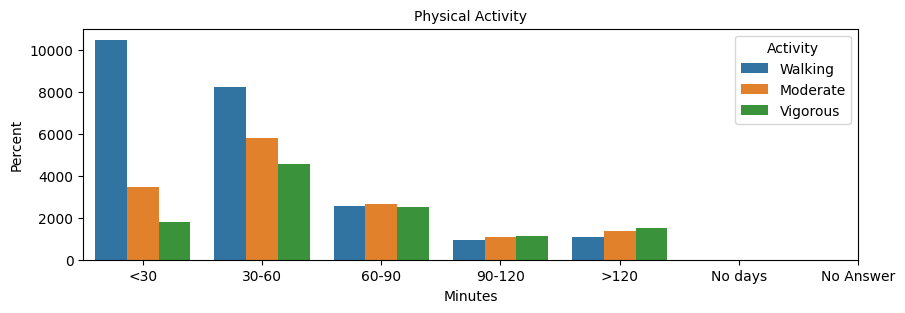

In [373]:
t_opts = ['<30', '30-60', '60-90', '90-120', '>120', 'No days', 'No Answer']
fig = simp_plot(merged_viz_df, 'Options', 'Participants', 'Physical Activity', 'Minutes', t_opts, hue='Activity')
